## **Proceso de preparación de datos**

- ### **Presentado por: Sebastián Carrero Cardona** 

- ### **Objetivo:** realizar la preparación de los datos al dataset que contiene información acerca de los tumores de cáncer de seno 

## **1. Integración de los datos**

- ### **Importación de librerías:**
cargamos las librerías necesarias para todo el proceso de preparación de los datos:

In [132]:
import pandas as pd
from ydata_profiling import ProfileReport
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
pd.pandas.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

- ### **Carga del dataset:**

In [147]:
df = pd.read_csv('../ANALITICA_PREDICTIVA/BreastCancer.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
652    912600         B        15.73         11.28          102.80      747.2   
653    913063         B        12.45         16.41           82.85      476.7   
654    913102         B        14.64         16.85           94.21      666.0   
655    913505         M        19.44         18.82          128.10     1167.0   
656    913512         B        11.68         16.17           75.49      420.5   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280       198.00000              0.10430   
..               ...               ...             ...                  ...   
652          0.10430           0.12990         0.11910              0.06211   
653          0.09514           0.15110         0.15440              0.04846   
654          0.08641           0.06698         0.05192              0.02791   
655          0.10890           0.14480         0.22560              0.11940   
656          0.11280           0.09263         0.04279              0.03132   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871  1095.0000      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956   1156.0000   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
652         0.1784                 0.06259   163.0000      0.3871   
653         0.2082                 0.07325     0.3921   1207.0000   
654         0.1409                 0.05355     0.2204   1006.0000   
655         0.1823                 0.06115     0.5659   1408.0000   
656         0.1853                 0.06401     0.3713   1154.0000   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0          8589.0   153.40       0.006399         0.04904       0.05373   
1          3398.0    74.08       0.005225         0.01308       0.01860   
2          4585.0    94.03       0.006150         0.04006       0.03832   
3          3445.0    27.23       0.009110         0.07458       0.05661   
4          5438.0    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
652        1143.0    13.87       0.006034         0.01820       0.03336   
653        5004.0    30.19       0.007234         0.07471       0.11140   
654        1471.0    19.98       0.003535         0.01393      18.00000   
655        3631.0    67.74       0.005288         0.02833       0.04256   
656        2554.0    27.57       0.008998         0.01292       0.01851   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0             0.015870      0.03003              0.006193         25.38   
1             0.013400      0.01389              0.003532         24.99   
2             0.020580      0.02250              0.004571         23.57   
3             0.018670      0.05963              0.009208  

In [4]:
df.shape

(657, 32)

- ### **Descripción del dataset:** 
La información característica de los tumores de cancer de seno se calculan a partir de una imagen digitalizada con aguja fina (PAAF) de una masa mamaria. Los datos describen las características de los núcleos celulares presentes en la imagen:

- **id:** número ID 
- **diagnosis:** El diagnóstico de los tejidos mamarios (M = maligno, B = benigno).
- **radius_mean:** media de las distancias del centro a los puntos del perímetro.
- **texture_mean:** desviación típica de los valores de la escala de grises.
- **perimeter_mean:** tamaño medio del núcleo tumoral.
- **area_mean:** área promedio
- **smoothness_mean:** media de la variación local de las longitudes de radio.
- **compactness_mean:** media de perímetro^2 / área - 1.0.
- **concavity_mean:** media de la gravedad de las partes cóncavas del contorno.
- **concave points_mean:** media del número de porciones cóncavas del contorno.
- **symmetry_mean:** media de simetría.
- **fractal_dimension_mean:** media para "aproximación de la línea de costa" - 1.
- **radius_se:** error típico de la media de las distancias del centro a los puntos del perímetro.
- **texture_se:** error típico de la desviación típica de los valores de la escala de grises
- **perimeter_se:** 
- **area_se:**
- **smoothness_se:** error estándar para la variación local de las longitudes de radio.
- **compactness_se:** error estándar para perímetro^2 / área - 1.0.
- **concavity_se:** error típico de la gravedad de las partes cóncavas del contorno.
- **concave points_se:** error estándar para el número de porciones cóncavas del contorno.
- **symmetry_se:** 
- **fractal_dimension_se:** error típico de la "aproximación de la línea de costa" - 1.
- **radius_worst:** "peor" o mayor valor medio para la media de las distancias del centro a los puntos del perímetro.
- **texture_worst:** "peor" o mayor valor medio de la desviación típica de los valores de la escala de grises.
- **perimeter_worst:**
- **area_worst:**
- **smoothness_worst:** "peor" o mayor valor medio de la variación local de la longitud de los radios.
- **compactness_worst:** "peor" o mayor valor medio para perímetro^2 / área - 1,0.
- **concavity_worst:** "peor" o mayor valor medio para la gravedad de las partes cóncavas del contorno.
- **concave points_worst:** "peor" o mayor valor medio para el número de porciones cóncavas del contorno.
- **symmetry_worst:**
- **fractal_dimension_worst:** "peor" o mayor valor medio para la "aproximación de la línea de costa" - 1.

**Variable objetivo:**
- **Diagnosis:** (M = maligno, B = benigno).


## **2. Descripción estadística de los datos**

In [11]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    567.000000      566.000000   566.000000   
mean   3.037183e+07   706.771388     19.293933       92.033057   655.838693   
std    1.250206e+08  2430.243368      4.305548       24.338116   352.517286   
min    8.670000e+03     7.760000      9.710000       43.790000   143.500000   
25%    8.692180e+05    12.210000     16.175000       75.180000   420.300000   
50%    9.060240e+05    13.850000     18.840000       86.290000   551.400000   
75%    8.813129e+06    17.680000     21.805000      104.250000   787.050000   
max    9.113205e+08  9904.000000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       566.000000        566.000000      566.000000           565.000000   
mean          4.327128          4.861126        7.528598             2.382926   
std          21.128193         26.896374       35.709288            16.211140   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086380          0.065307        0.029600             0.020310   
50%           0.095955          0.094575        0.064905             0.034380   
75%           0.106175          0.132725        0.144000             0.077260   
max         123.000000        277.000000      313.000000           162.000000   

       symmetry_mean  fractal_dimension_mean    radius_se   texture_se  \
count     565.000000              566.000000   567.000000   567.000000   
mean       17.084573                0.855286    77.409025   823.738841   
std        54.018014                7.122095   277.779756   829.980939   
min         0.116700                0.049960     0.111500     0.360200   
25%         0.163400                0.057800     0.236150     0.856100   
50%         0.181300                0.061635     0.341600  1025.000000   
75%         0.203600                0.066397     0.584650  1416.500000   
max       304.000000               78.000000  2873.000000  4885.000000   

       perimeter_se      area_se  smoothness_se  compactness_se  concavity_se  \
count    567.000000   567.000000     568.000000      568.000000    568.000000   
mean    2551.740668   317.203845       0.007037        0.176684      1.155683   
std     1755.709563  1534.886731       0.003004        1.680270     17.486265   
min        0.771400    10.080000       0.001713        0.002252      0.000000   
25%     1491.000000    18.515000       0.005166        0.013133      0.015062   
50%     2155.000000    25.780000       0.006374        0.020570      0.025985   
75%     3172.000000    50.400000       0.008129        0.032745      0.042530   
max     9807.000000  9833.000000       0.031130       27.000000    396.000000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         568.000000   568.000000            569.000000    569.000000   
mean            0.068060     0.231586              0.014329    315.194921   
std             0.785078     2.114789              0.251388   1655.459336   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007634     0.015175              0.002248     13.180000   
50%             0.010950     0.018780              0.003187     15.150000   
75%             0.014833     0.023610              0.004558     19.850000   
max            12.000000    31.000000              6.000000   9981.000000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128         10.633281   
std         6.146258        33.602542   569.356993         37.236433   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.117800   
50%        25.410000        97.660000   686.500000  

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       657 non-null    int64  
 1   diagnosis                647 non-null    object 
 2   radius_mean              655 non-null    float64
 3   texture_mean             653 non-null    float64
 4   perimeter_mean           651 non-null    float64
 5   area_mean                650 non-null    float64
 6   smoothness_mean          650 non-null    float64
 7   compactness_mean         650 non-null    float64
 8   concavity_mean           652 non-null    float64
 9   concave points_mean      651 non-null    float64
 10  symmetry_mean            651 non-null    float64
 11  fractal_dimension_mean   654 non-null    float64
 12  radius_se                655 non-null    float64
 13  texture_se               655 non-null    float64
 14  perimeter_se             6

- ### **Definiendo los tipos de datos:**

In [157]:
df['diagnosis'] = df['diagnosis'].astype('category')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       657 non-null    int64   
 1   diagnosis                647 non-null    category
 2   radius_mean              655 non-null    float64 
 3   texture_mean             653 non-null    float64 
 4   perimeter_mean           651 non-null    float64 
 5   area_mean                650 non-null    float64 
 6   smoothness_mean          650 non-null    float64 
 7   compactness_mean         650 non-null    float64 
 8   concavity_mean           652 non-null    float64 
 9   concave points_mean      651 non-null    float64 
 10  symmetry_mean            651 non-null    float64 
 11  fractal_dimension_mean   654 non-null    float64 
 12  radius_se                655 non-null    float64 
 13  texture_se               655 non-null    float64 
 14  perimeter_

## **3. Tratamiento datos atípicos**

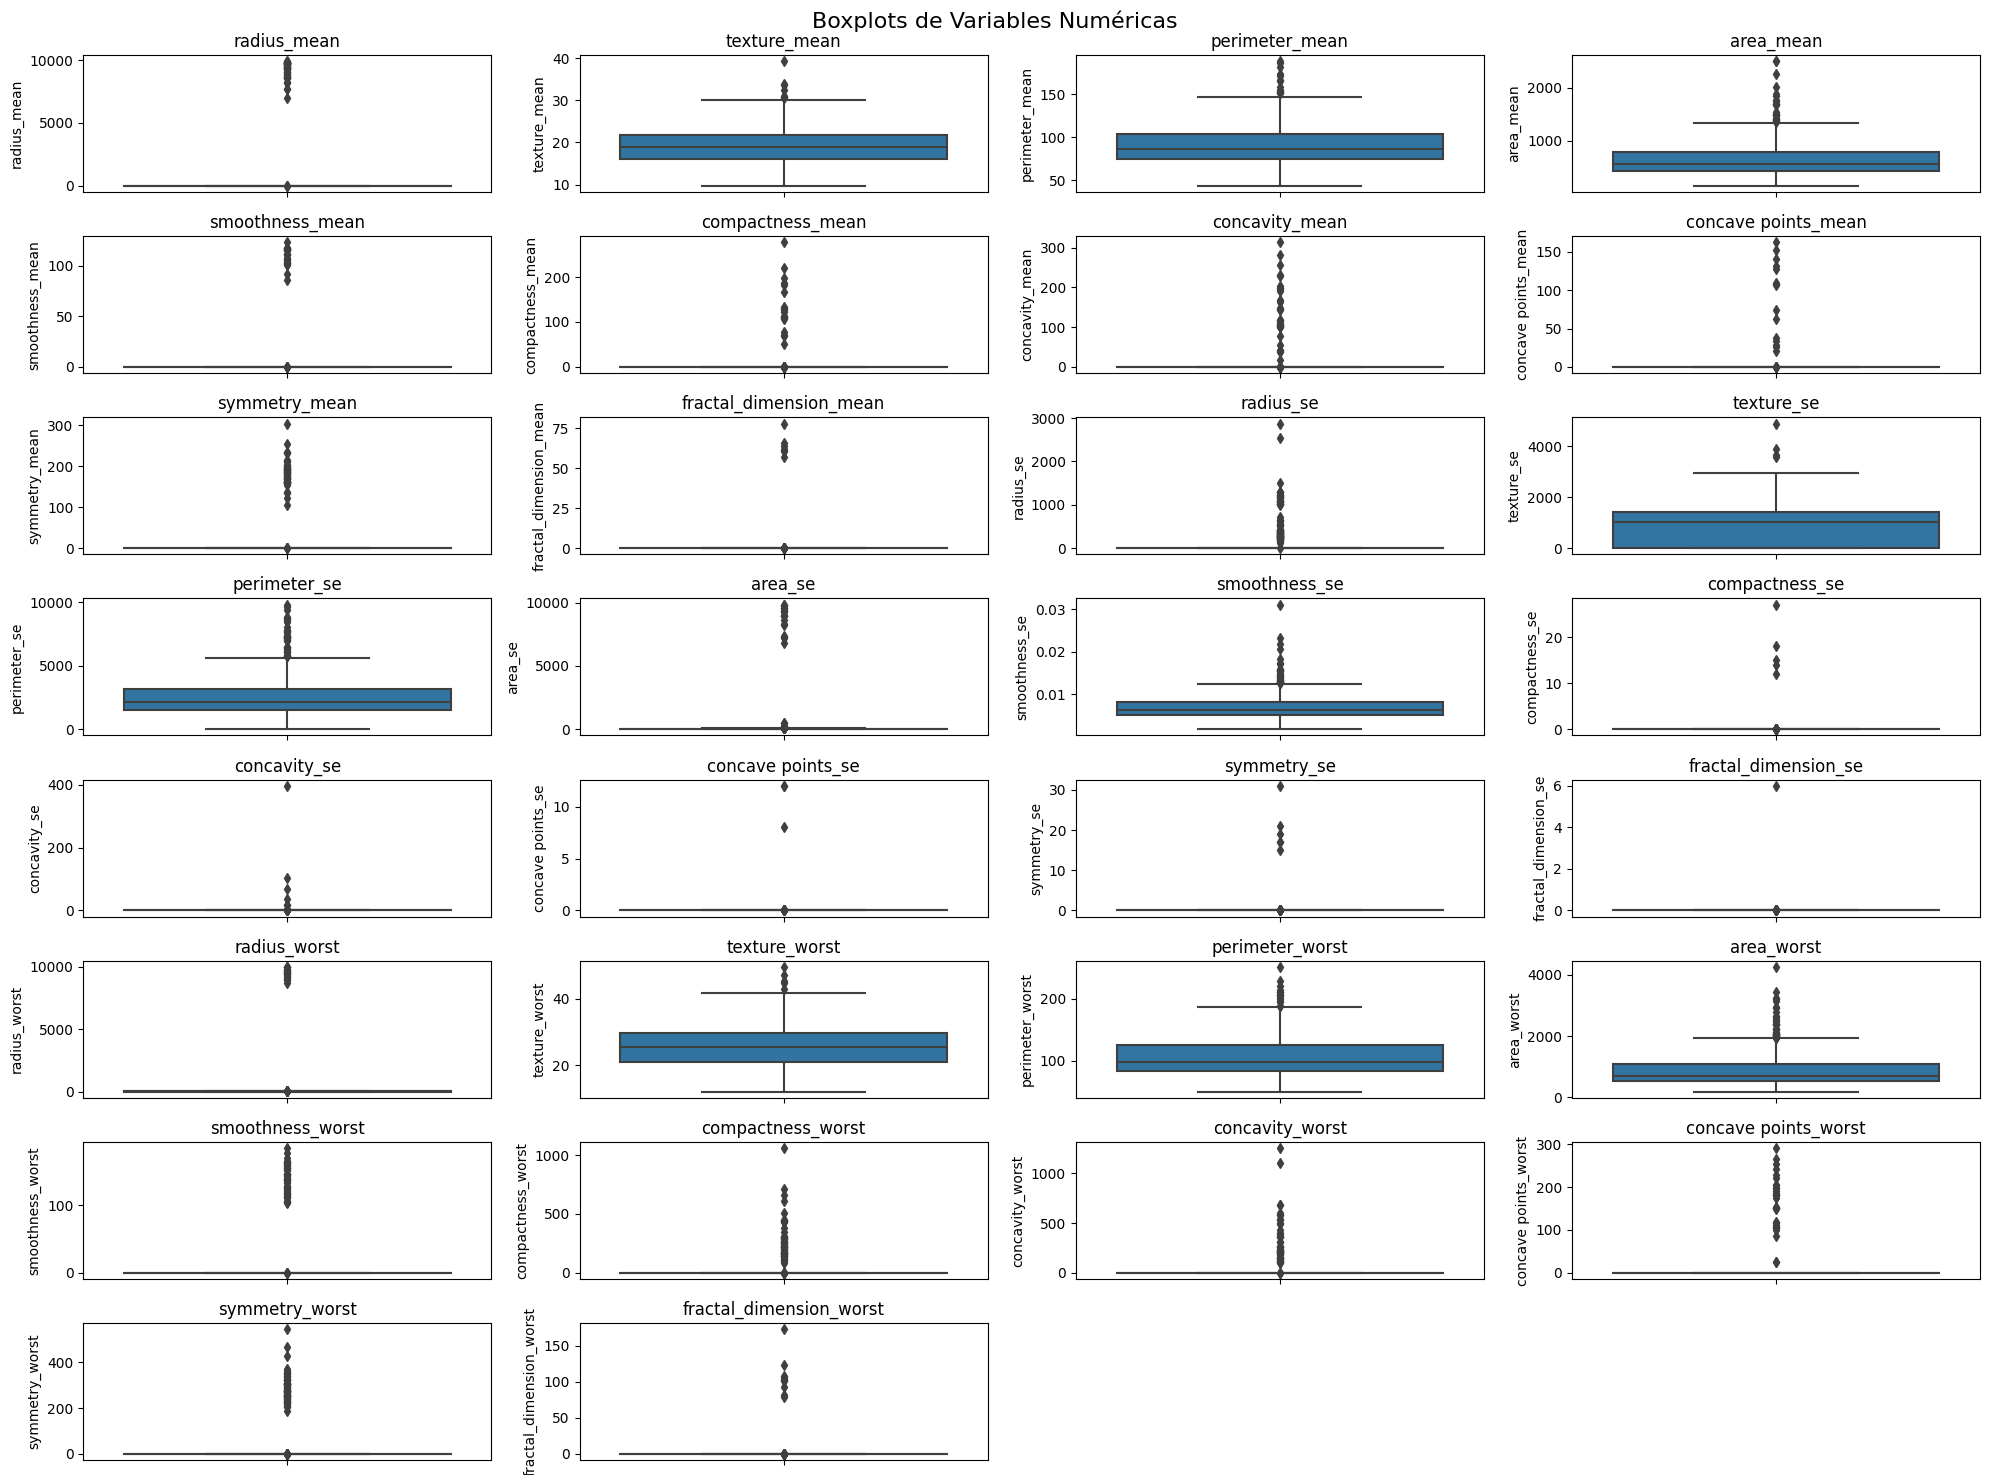

In [18]:
# Variables numéricas a graficar
columnas_numericas = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean',
                      'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                      'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
                      'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
                      'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',]

# Calcula el número de filas y columnas necesarias
num_variables = len(columnas_numericas)
num_cols = 4  # Número de columnas en la figura
num_rows = (num_variables - 1) // num_cols + 1

# Crea una figura con subgráficos distribuidos en filas y columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Itera a través de las columnas y crea un boxplot para cada una
for i, columna in enumerate(columnas_numericas):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df, y=columna, ax=axes[row, col])
    axes[row, col].set_title(f'{columna}')

# Elimina los ejes vacíos si no se utilizan
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle('Boxplots de Variables Numéricas', fontsize=16)
plt.show()

Identificamos que todas las variables contienen datos atípicos, pero debido a que no temos una regla de calidad no tenemos el conocimiento técnico para afirmar que son errores, por tal razón se conservan los datos tal y como están.

## **4. Tratamiento de datos duplicados**

In [19]:
len(df['id'].unique())

569

Identiicacmos que por ID solo hay 569 registros únicos y según la información antes mencionada el dataset tiene 657 registros en total, por tal razón procedemos a eliminar toda la fila que se identifique duplicada según el ID:

In [148]:
df = df.drop_duplicates(['id'])
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280       198.00000              0.10430   
..               ...               ...             ...                  ...   
564        111.00000           0.11590         0.24390              0.13890   
565          0.09780           0.10340       144.00000              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780         277.00000         0.35140            152.00000   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871  1095.0000      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956   1156.0000   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623  1176.0000   1256.0000   
565         0.1752                 0.05533     0.7655   2463.0000   
566       159.0000                 0.05648     0.4564   1075.0000   
567         0.2397                 0.07016   726.0000   1595.0000   
568         0.1587                 0.05884     0.3857   1428.0000   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0          8589.0   153.40       0.006399         0.04904       0.05373   
1          3398.0    74.08       0.005225         0.01308       0.01860   
2          4585.0    94.03       0.006150         0.04006       0.03832   
3          3445.0    27.23       0.009110         0.07458       0.05661   
4          5438.0    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564        7673.0   158.70       0.010300         0.02891       0.05198   
565        5203.0    99.04       0.005769         0.02423       0.03950   
566        3425.0    48.55       0.005903         0.03731       0.04730   
567        5772.0    86.22       0.006522         0.06158       0.07117   
568        2548.0    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193         25.38   
1              0.01340      0.01389              0.003532         24.99   
2              0.02058      0.02250              0.004571         23.57   
3              0.01867      0.05963              0.009208  

## **5. Eliminar variables irrelevantes**

Debido a que el ID no nos proporciona información útil para predicciones futuras y ya fue utilizada para identificar valores duplicados se eilimna del dataset por considerarse irrelevante.

In [149]:
df.drop('id', axis=1, inplace=True)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280        198.0000              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871  1095.0000      0.9053        8589.0   
1         0.1812                 0.05667     0.5435      0.7339        3398.0   
2         0.2069                 0.05999     0.7456      0.7869        4585.0   
3         0.2597                 0.09744     0.4956   1156.0000        3445.0   
4         0.1809                 0.05883     0.7572      0.7813        5438.0   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374           205.0000   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416              186.0000        275.0000   
2           0.4504              243.0000          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                173.00000  
4                  0.07678

## **6. Análisis Exploratorio**

In [22]:
ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [120]:
pd.value_counts(df['diagnosis'])

B    349
M    210
Name: diagnosis, dtype: int64

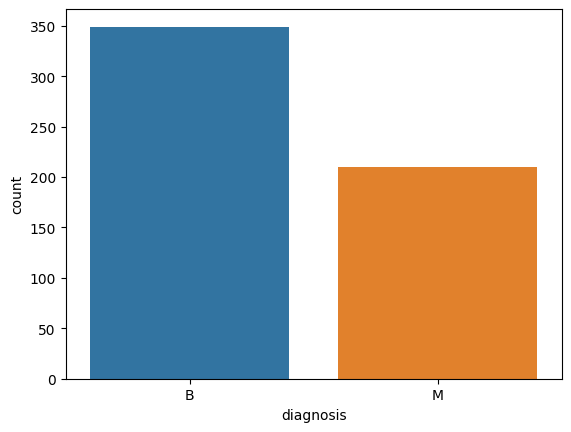

In [121]:
sns.countplot(x='diagnosis', data=df)
plt.show()

Según el análisis exploratorio anterior identificamos que en la mayoría de las variables se encuentran datos nulos, a continuación procedemos con el tratamiento correspondiente.

## **7. Tratamiento de datos nulos**

In [84]:
df.isnull().sum()

diagnosis                  10
radius_mean                 0
texture_mean                2
perimeter_mean              3
area_mean                   3
smoothness_mean             3
compactness_mean            3
concavity_mean              3
concave points_mean         4
symmetry_mean               4
fractal_dimension_mean      3
radius_se                   2
texture_se                  2
perimeter_se                2
area_se                     2
smoothness_se               1
compactness_se              1
concavity_se                1
concave points_se           1
symmetry_se                 1
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

Identificadas las variables con valores nulos, procedo a realizara la imputación por media para las variables númericas, a excepción de la variable diagnosis que es categórica, la cual se hará con la moda

In [150]:
df['texture_mean'] = df['texture_mean'].fillna(value=df['texture_mean'].mean())
df['perimeter_mean'] = df['perimeter_mean'].fillna(value=df['perimeter_mean'].mean())
df['area_mean'] = df['area_mean'].fillna(value=df['area_mean'].mean())
df['smoothness_mean'] = df['smoothness_mean'].fillna(value=df['smoothness_mean'].mean())
df['compactness_mean'] = df['compactness_mean'].fillna(value=df['compactness_mean'].mean())
df['concavity_mean'] = df['concavity_mean'].fillna(value=df['concavity_mean']. mean())
df['concave points_mean'] = df['concave points_mean'].fillna(value=df['concave points_mean'].mean())
df['symmetry_mean'] = df['symmetry_mean'].fillna(value=df['symmetry_mean'].mean())
df['fractal_dimension_mean'] = df['fractal_dimension_mean'].fillna(value=df['fractal_dimension_mean'].mean())
df['radius_se'] = df['radius_se'].fillna(value=df['radius_se'].mean())
df['texture_se'] = df['texture_se'].fillna(value=df['texture_se'].mean())
df['perimeter_se'] = df['perimeter_se'].fillna(value=df['perimeter_se'].mean())
df['area_se'] = df['area_se'].fillna(value=df['area_se'].mean())
df['smoothness_se'] = df['smoothness_se'].fillna(value=df['smoothness_se'].mean())
df['compactness_se'] = df['compactness_se'].fillna(value=df['compactness_se'].mean())
df['concavity_se'] = df['concavity_se'].fillna(value=df['concavity_se'].mean())
df['concave points_se'] = df['concave points_se'].fillna(value=df['concave points_se'].mean())
df['symmetry_se'] = df['symmetry_se'].fillna(value=df['symmetry_se'].mean())

Conversión encoder de la variable categorica 'diagnosis', para posteriormente realizar la imputación con la moda a los valores nulos. 

In [151]:
df['diagnosis'] = df['diagnosis'].replace({'M' : 1, 'B': 0})

In [152]:
moda_diagnosis = df['diagnosis'].mode()[0]
df['diagnosis'] = df['diagnosis'].fillna(value=moda_diagnosis)

In [153]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [125]:
#Volvemor a graficar la variable objetivo despues de la imputación de los datos nulos
pd.value_counts(df['diagnosis'])

0    359
1    210
Name: diagnosis, dtype: int64

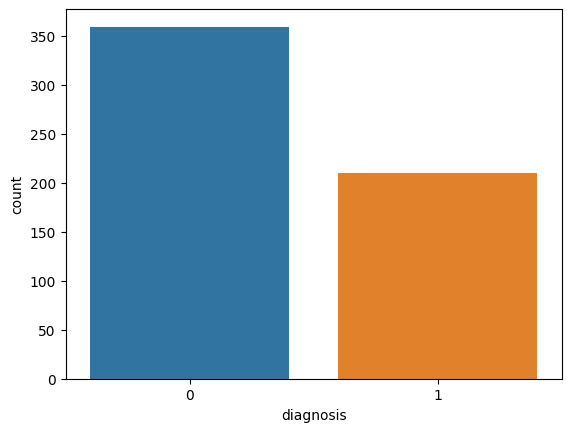

In [126]:
sns.countplot(x='diagnosis', data=df)
plt.show()

## **8. Análisis de correlaciones**

In [34]:
sns.pairplot(df, diag_kind = "kde")
plt.show()

In [158]:
matriz_corr = df.corr()
matriz_corr

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000     -0.100198       -0.387911  -0.320239   
texture_mean               -0.100198      1.000000        0.331032   0.322524   
perimeter_mean             -0.387911      0.331032        1.000000   0.986497   
area_mean                  -0.320239      0.322524        0.986497   1.000000   
smoothness_mean             0.029496      0.034227        0.105486   0.106857   
compactness_mean           -0.050678      0.140657        0.098352   0.076365   
concavity_mean             -0.002320      0.054748        0.155046   0.151258   
concave points_mean        -0.041471      0.082592        0.215735   0.214962   
symmetry_mean               0.059170     -0.031770       -0.098386  -0.097654   
fractal_dimension_mean     -0.031530     -0.094580       -0.024665  -0.028604   
radius_se                  -0.059990      0.107485        0.389575   0.437921   
texture_se                  0.135064      0.341303       -0.085590  -0.065619   
perimeter_se               -0.064599      0.259850        0.557852   0.548320   
area_se                     0.138562     -0.090844       -0.160627  -0.131062   
smoothness_se               0.379360      0.005766       -0.205064  -0.168877   
compactness_se             -0.025095     -0.014414        0.018690   0.021734   
concavity_se                0.141264     -0.036323       -0.008451  -0.003617   
concave points_se          -0.020739     -0.022571        0.026918   0.022831   
symmetry_se                 0.075549     -0.009422       -0.051771  -0.049668   
fractal_dimension_se       -0.009222      0.046057        0.020297   0.008805   
radius_worst                0.441559     -0.041793       -0.273427  -0.217479   
texture_worst              -0.115969      0.911017        0.303103   0.287559   
perimeter_worst            -0.347007      0.357037        0.969499   0.958258   
area_worst                 -0.278298      0.342655        0.940693   0.958358   
smoothness_worst            0.024718     -0.005588       -0.000326  -0.003046   
compactness_worst          -0.017172      0.033983        0.022575   0.009318   
concavity_worst             0.005269      0.031218        0.057947   0.055098   
concave points_worst       -0.012441      0.059548        0.184976   0.183437   
symmetry_worst             -0.036770     -0.065130        0.085840   0.082607   
fractal_dimension_worst    -0.036936      0.030697        0.038689   0.018802   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.029496         -0.050678       -0.002320   
texture_mean                    0.034227          0.140657        0.054748   
perimeter_mean                  0.105486          0.098352        0.155046   
area_mean                       0.106857          0.076365        0.151258   
smoothness_mean                 1.000000         -0.035170        0.014336   
compactness_mean               -0.035170          1.000000        0.103176   
concavity_mean                  0.014336          0.103176        1.000000   
concave points_mean             0.042962          0.178494        0.066335   
symmetry_mean                   0.001245          0.006034       -0.020026   
fractal_dimension_mean         -0.022244         -0.019697       -0.023283   
radius_se                       0.104901         -0.001183       -0.015323   
texture_se                      0.023307          0.031856       -0.026685   
perimeter_se                    0.138415          0.029715        0.107653   
area_se                         0.126247          0.022034        0.019962   
smoothness_se                   0.064198         -0.024359        0.019660   
compactness_se                 -0.017930         -0.014022        0.075549   
concavity_se                   -0.012828         -0.011051       -0.012526   
concave points_se              -0.013658         -0.011960       -0.013359   
symmetry_se                    

In [159]:
df['diagnosis'] = df['diagnosis'].astype('int64')

In [160]:
matriz_corr = df.corr()
matriz_corr

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000    -0.217119      0.413026        0.739364   
radius_mean              -0.217119     1.000000     -0.100198       -0.387911   
texture_mean              0.413026    -0.100198      1.000000        0.331032   
perimeter_mean            0.739364    -0.387911      0.331032        1.000000   
area_mean                 0.706693    -0.320239      0.322524        0.986497   
smoothness_mean           0.129789     0.029496      0.034227        0.105486   
compactness_mean          0.100008    -0.050678      0.140657        0.098352   
concavity_mean            0.133154    -0.002320      0.054748        0.155046   
concave points_mean       0.141712    -0.041471      0.082592        0.215735   
symmetry_mean            -0.077516     0.059170     -0.031770       -0.098386   
fractal_dimension_mean   -0.045428    -0.031530     -0.094580       -0.024665   
radius_se                 0.246560    -0.059990      0.107485        0.389575   
texture_se               -0.011850     0.135064      0.341303       -0.085590   
perimeter_se              0.542008    -0.064599      0.259850        0.557852   
area_se                  -0.121975     0.138562     -0.090844       -0.160627   
smoothness_se            -0.065954     0.379360      0.005766       -0.205064   
compactness_se            0.031767    -0.025095     -0.014414        0.018690   
concavity_se             -0.005661     0.141264     -0.036323       -0.008451   
concave points_se         0.003982    -0.020739     -0.022571        0.026918   
symmetry_se              -0.014436     0.075549     -0.009422       -0.051771   
fractal_dimension_se      0.055654    -0.009222      0.046057        0.020297   
radius_worst             -0.135961     0.441559     -0.041793       -0.273427   
texture_worst             0.455785    -0.115969      0.911017        0.303103   
perimeter_worst           0.781697    -0.347007      0.357037        0.969499   
area_worst                0.733919    -0.278298      0.342655        0.940693   
smoothness_worst          0.030927     0.024718     -0.005588       -0.000326   
compactness_worst         0.087051    -0.017172      0.033983        0.022575   
concavity_worst           0.064097     0.005269      0.031218        0.057947   
concave points_worst      0.194961    -0.012441      0.059548        0.184976   
symmetry_worst            0.077952    -0.036770     -0.065130        0.085840   
fractal_dimension_worst   0.143337    -0.036936      0.030697        0.038689   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.706693         0.129789          0.100008   
radius_mean              -0.320239         0.029496         -0.050678   
texture_mean              0.322524         0.034227          0.140657   
perimeter_mean            0.986497         0.105486          0.098352   
area_mean                 1.000000         0.106857          0.076365   
smoothness_mean           0.106857         1.000000         -0.035170   
compactness_mean          0.076365        -0.035170          1.000000   
concavity_mean            0.151258         0.014336          0.103176   
concave points_mean       0.214962         0.042962          0.178494   
symmetry_mean            -0.097654         0.001245          0.006034   
fractal_dimension_mean   -0.028604        -0.022244         -0.019697   
radius_se                 0.437921         0.104901         -0.001183   
texture_se               -0.065619         0.023307          0.031856   
perimeter_se              0.548320         0.138415          0.029715   
area_se                  -0.131062         0.126247          0.022034   
smoothness_se            -0.168877         0.064198         -0.024359   
compactness_se            0.021734        -0.017930         -0.014022   
concavity_se             -0.003617        -0.012828         -0.011051   
concave points_se         0.022831        -0.

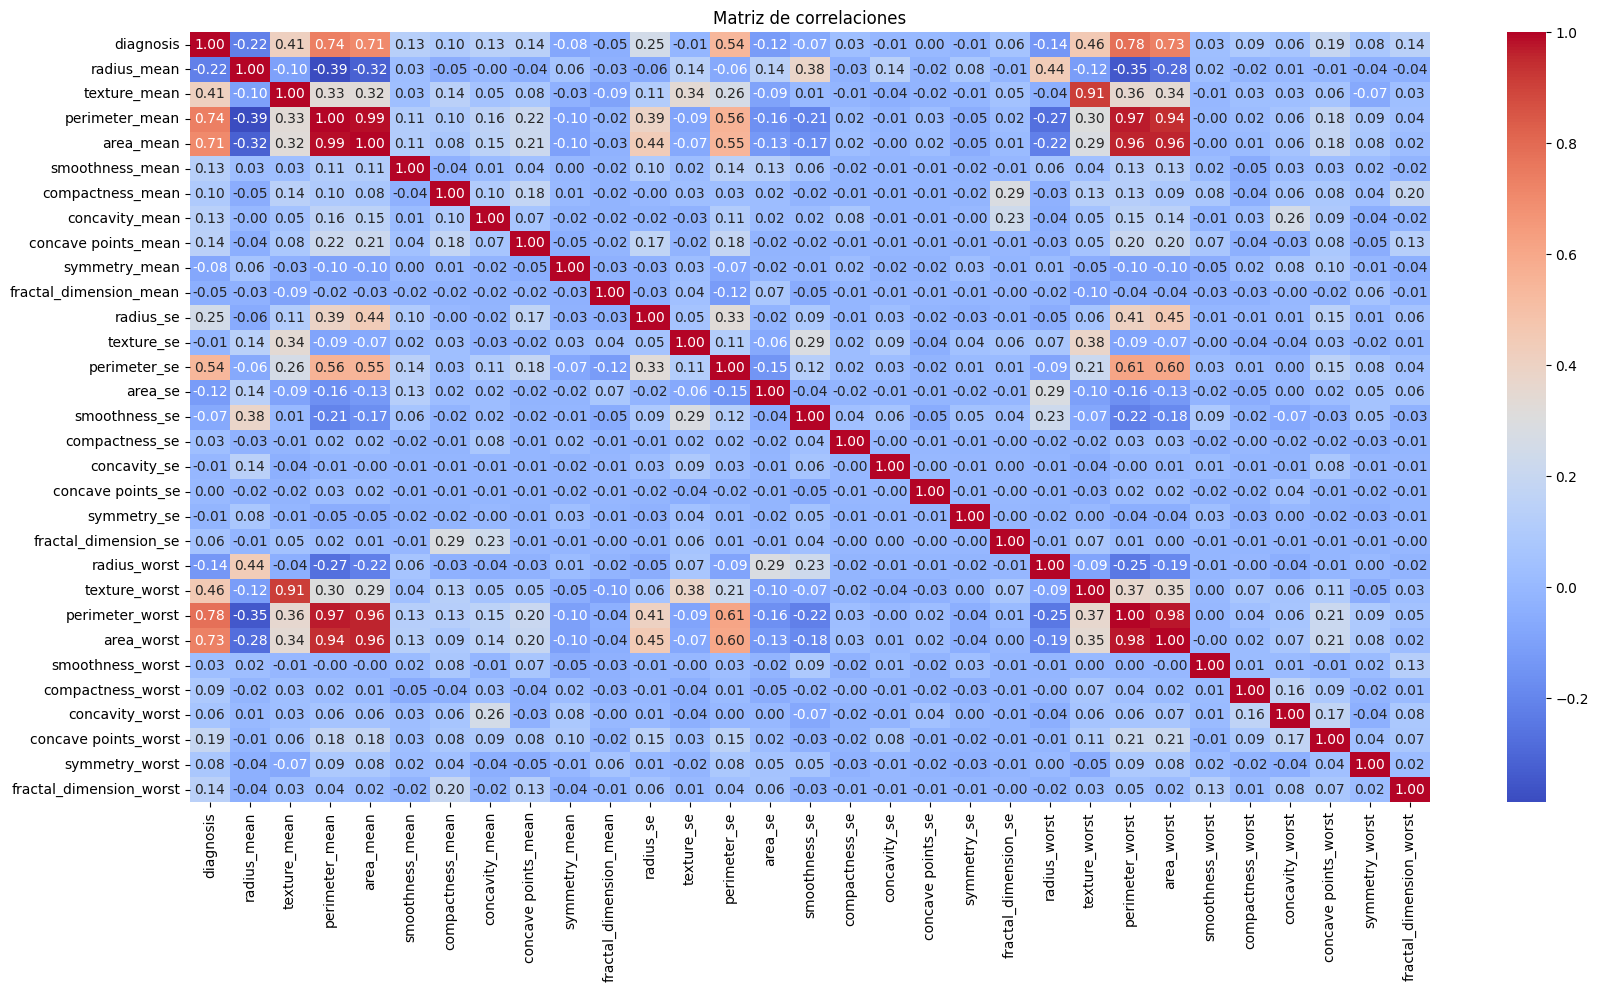

In [161]:
#Matriz de correlaciones gráfica
plt.figure(figsize=(20, 10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaciones')
plt.show()


In [162]:
matriz_corr['diagnosis_vs_variables'] = matriz_corr['diagnosis']
matriz_corr[['diagnosis_vs_variables']].sort_values(by = 'diagnosis_vs_variables', ascending = False).style.background_gradient (cmap = 'coolwarm')

Según el análisis de las correlaciones podemos identificar que las siguientes variables tienen un indice de correlación absoluto inferior a 0.1:

- compactness_worst:	0.087051
- symmetry_worst:	0.077952
- concavity_worst:	0.064097
- fractal_dimension_se:	0.055654
- compactness_se:	0.031767
- smoothness_worst: 0.030927
- concave points_se:	0.003982
- concavity_se: -0.005661
- texture_se:	-0.011850
- symmetry_se: -0.014436
- fractal_dimension_mean:	-0.045428
- smoothness_se:	-0.065954
- symmetry_mean:	-0.077516


## **9. Reducción de variables**

Procedemos a eliminar las variables que contienen una correlación absoluto inferior al 0.1, identificadas anteriormente

In [163]:
df_num = df.copy()

In [164]:
# Calcular la correlación absoluta con la variable "diagnosis"
correlaciones_diagnosis = df_num.corr().abs()['diagnosis']

# Definir el umbral de correlación mínima
threshold = 0.1

# Obtener las variables con correlación menor al umbral
variables_baja_correlacion = correlaciones_diagnosis[correlaciones_diagnosis < threshold].index.tolist()

# Eliminar las variables con menor correlación
df_num.drop(columns=variables_baja_correlacion, inplace=True)

In [165]:
df_num

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280       198.00000              0.10430   
..               ...               ...             ...                  ...   
564        111.00000           0.11590         0.24390              0.13890   
565          0.09780           0.10340       144.00000              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780         277.00000         0.35140            152.00000   
568          0.05263           0.04362         0.00000              0.00000   

     radius_se  perimeter_se  area_se  radius_worst  texture_worst  \
0    1095.0000        8589.0   153.40         25.38          17.33   
1       0.5435        3398.0    74.08         24.99          23.41   
2       0.7456        4585.0    94.03         23.57          25.53   
3       0.4956        3445.0    27.23         14.91          26.50   
4       0.7572        5438.0    94.44         22.54          16.67   
..         ...           ...      ...           ...            ...   
564  1176.0000        7673.0   158.70         25.45          26.40   
565     0.7655        5203.0    99.04         23.69          38.25   
566     0.4564        3425.0    48.55         18.98          34.12   
567   726.0000        5772.0    86.22         25.74          39.42   
568     0.3857        2548.0    19.15       9456.00          30.37   

     perimeter_worst  area_worst  concave points_worst  \
0             184.60      2019.0                0.2654   
1             158.80      1956.0              186.0000   
2             152.50      1709.0              243.0000   
3              98.87       567.7                0.2575   
4             152.20      1575.0                0.1625   
..               ...         ...                   ...   
564           166.10      2027.0                0.2216   
565           155.00      1731.0                0.1628   
566           126.70      1124.0                0.1418   
567           184.60      1821.0              265.0000   
568            59.16       268.6                0.0000   

     fractal_dimension_worst  
0                    0.11890  
1                    0.08902  
2                    0.08758  
3                  173.00000  
4                    0.07678  
..                       ...  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                124.00000  
568                  0.07039  

[569 rows x 18 columns]

Observamos que de un dataframe de 32 columnas logramos reducirlo a 18, eliminando aquellas vairables que se correlacionaban que tenian un correalción menor al umbral definido.

- ### **Eliminación de variables independientes altamente correlacionadas entre sí:**

Podemos observar que las variables independientes con una correlación absoluta mayor a 0.8 entre sí son las siguientes:

- **texture_mean  vs texture_worst =  0.91:** la variable con menor correlación con la variable objetivo es **texture_mean** con 0.41.

- **perimeter_mean vs perimeter_worst = 0.97:** la variable con menor correlación con la variable objetivo es **perimeter_mean** con 0.74

- **perimeter_mean vs area_worst =   0.94:** la variable con menor correlación con la variable objetivo es **perimeter_mean** con 0.74

- **area_mean vs perimeter_worst = 0.96:** la variable con menor correlación con la variable objetivo es **area_mean** con 0.71

- **area_mean vs area_worst  = 0.96:** la variable con menor correlación con la variable objetivo es **area_mean** con 0.71


Sabiendo esto tomamos la decisión de eliminar las siguiente variables toda vez que son redundantes para aplicar un modelo predictivo:

- **texture_mean**
- **perimeter_mean**
- **area_mean**

In [166]:
df_num.drop('texture_mean', axis=1, inplace = True)
df_num.drop('perimeter_mean', axis=1, inplace = True)
df_num.drop('area_mean', axis=1, inplace = True)
df_num.head()

diagnosis  radius_mean  smoothness_mean  compactness_mean  concavity_mean  \
0          1        17.99          0.11840           0.27760          0.3001   
1          1        20.57          0.08474           0.07864          0.0869   
2          1        19.69          0.10960           0.15990          0.1974   
3          1        11.42          0.14250           0.28390          0.2414   
4          1        20.29          0.10030           0.13280        198.0000   

   concave points_mean  radius_se  perimeter_se  area_se  radius_worst  \
0              0.14710  1095.0000        8589.0   153.40         25.38   
1              0.07017     0.5435        3398.0    74.08         24.99   
2              0.12790     0.7456        4585.0    94.03         23.57   
3              0.10520     0.4956        3445.0    27.23         14.91   
4              0.10430     0.7572        5438.0    94.44         22.54   

   texture_worst  perimeter_worst  area_worst  concave points_worst  \
0          17.33           184.60      2019.0                0.2654   
1          23.41           158.80      1956.0              186.0000   
2          25.53           152.50      1709.0              243.0000   
3          26.50            98.87       567.7                0.2575   
4          16.67           152.20      1575.0                0.1625   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                173.00000  
4                  0.07678

In [168]:
df_num.shape

(569, 15)

## **9. Balanceo de los datos**

In [172]:
df_num['diagnosis'] = df['diagnosis'].astype('category')

In [175]:
pd.value_counts(df['diagnosis'])

0    359
1    210
Name: diagnosis, dtype: int64

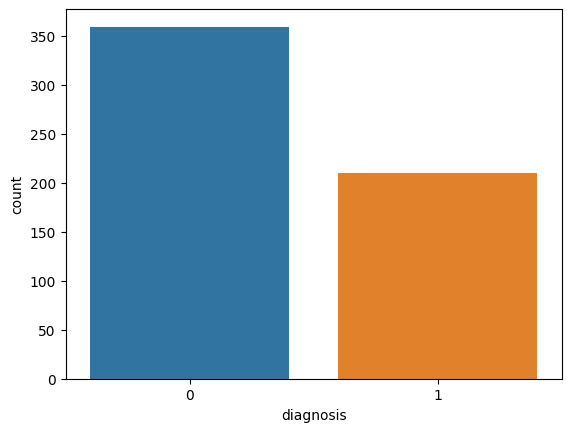

In [176]:
sns.countplot( x = 'diagnosis', data = df_num)
plt.show()

Identificamos que diagnostico con tumores malignos tiene una participación del 37% en el dataset mientras que con tumores benignos tiene una participación del 63%, lo que nos obliga a hacer un balanceo del dataset. Para no tener que eliminar información procedemos a realizar un oversampling.

<Axes: >

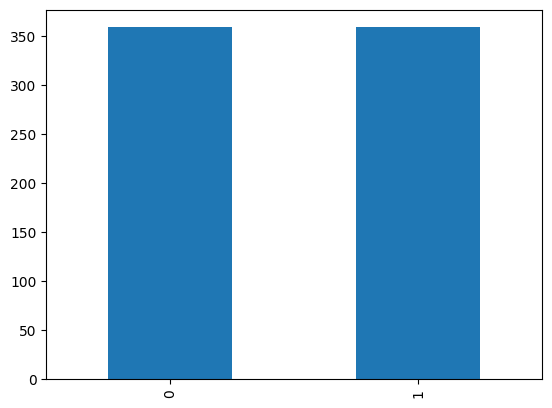

In [177]:
#Importa la clase SMOTENC de la biblioteca imblearn
from imblearn.over_sampling import SMOTENC 

#Creación de un objeto SMOTENC para realizar el sobremuestreo sintético
#SMOTENC: aplica la técnica de sobremuestreo a un conjunto de datos, considerando las características categóricas 
sm = SMOTENC(random_state=42, categorical_features=[0]) #sm = SMOTE(random_state=42) para datos sólo numéricos

#Aplicación de SMOTENC y creación de un DataFrame balanceado:
#Seleccionamos las variables de entrada y la variable de salida
X_bal, Y_bal = sm.fit_resample(df_num[['radius_mean',	'smoothness_mean',	'compactness_mean',	'concavity_mean', 'concave points_mean',
                                   'radius_se',	'perimeter_se',	'area_se', 'radius_worst',	'texture_worst', 'perimeter_worst',	'area_worst',
                                       'concave points_worst',	'fractal_dimension_worst']], df_num['diagnosis'])
# Creamos un dataframe con los resultados
df_balanceado = pd.DataFrame({'radius_mean': X_bal['radius_mean'],	'smoothness_mean': X_bal['smoothness_mean'], 'compactness_mean': X_bal['compactness_mean'],
                              	'concavity_mean': X_bal['concavity_mean'], 'concave points_mean': X_bal['concave points_mean'], 'radius_se': X_bal['radius_se'],
                                    'perimeter_se': X_bal['perimeter_se'],	'area_se': X_bal['area_se'], 'radius_worst': X_bal['radius_worst'],
                                        'texture_worst': X_bal['texture_worst'], 'perimeter_worst': X_bal['perimeter_worst'], 'area_worst': X_bal['area_worst'],
                                        'concave points_worst': X_bal['concave points_worst'], 'fractal_dimension_worst': X_bal['fractal_dimension_worst'],
                                         'diagnosis': Y_bal})
#Visualización del balanceo
pd.value_counts(df_balanceado['diagnosis']).plot(kind="bar")

In [187]:
df_balanceado.shape

(718, 15)

Depues de realizar el balanceo de los datos, observamos que obtenemos un dataframe final con 718 registros y conservamos las mismas 15 variables.

## **10. Transformación de datos**
Con el objetivo de que algoritmos de aprendizaje automático converjan más rápido y tengan un mejor desempeño, realizamos el proceso de normalización a los valores de las variables para que estén en la misma escala.

In [182]:
from sklearn.preprocessing import StandardScaler

# Inicializa el escalador estándar
scaler = StandardScaler()

# Selecciona solo las columnas numéricas
columnas_numericas = df_balanceado.select_dtypes(include=['number'])

# Normaliza las columnas numéricas
df_balanceado[columnas_numericas.columns] = scaler.fit_transform(columnas_numericas)

In [185]:
df_balanceado.head()

radius_mean  smoothness_mean  compactness_mean  concavity_mean  \
0    -0.250399        -0.244201         -0.183347       -0.239808   
1    -0.249216        -0.245708         -0.190979       -0.245543   
2    -0.249619        -0.244595         -0.187862       -0.242571   
3    -0.253414        -0.243121         -0.183105       -0.241387   
4    -0.249344        -0.245011         -0.188902        5.078735   

   concave points_mean  radius_se  perimeter_se   area_se  radius_worst  \
0            -0.179062   3.495643      2.978444 -0.082530     -0.154885   
1            -0.183156  -0.301576      0.274168 -0.140575     -0.155149   
2            -0.180083  -0.300875      0.892541 -0.125976     -0.156110   
3            -0.181291  -0.301742      0.298653 -0.174859     -0.161973   
4            -0.181339  -0.300834      1.336915 -0.125676     -0.156808   

   texture_worst  perimeter_worst  area_worst  concave points_worst  \
0      -1.515579         1.974227    1.684788             -0.237840   
1      -0.495975         1.248242    1.581326              4.392679   
2      -0.140455         1.070966    1.175689              5.813737   
3       0.022212        -0.438126   -0.698619             -0.238037   
4      -1.626260         1.062525    0.955626             -0.240406   

   fractal_dimension_worst diagnosis  
0                -0.129680         1  
1                -0.131914         1  
2                -0.132022         1  
3                12.794427         1  
4                -0.132829         1